## Ames Iowa Housing Dataset
## Project 3 - Housing Data Analysis
## Model Objective to Predict the Closing Sale Price of a Home

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas

%matplotlib inline


In [3]:
## Read In housing dataset

ames_df = pd.read_csv('C:/Users/AnalyticsStudent/Documents/Nates Docs/NorthWestern_Post-Grad/1_MSDS-410/Module_7/ames_housing.csv') 

ames_df.head()


SID        PID  SubClass Zoning  LotFrontage  LotArea Street Alley  \
0    1  526301100        20     RL        141.0    31770   Pave   NaN   
1    2  526350040        20     RH         80.0    11622   Pave   NaN   
2    3  526351010        20     RL         81.0    14267   Pave   NaN   
3    4  526353030        20     RL         93.0    11160   Pave   NaN   
4    5  527105010        60     RL         74.0    13830   Pave   NaN   

  LotShape LandContour  ... MoSold YrSold SaleType SaleCondition SalePrice  \
0      IR1         Lvl  ...      5   2010      WD         Normal    215000   
1      Reg         Lvl  ...      6   2010      WD         Normal    105000   
2      IR1         Lvl  ...      6   2010      WD         Normal    172000   
3      Reg         Lvl  ...      4   2010      WD         Normal    244000   
4      IR1         Lvl  ...      3   2010      WD         Normal    189900   

  TotalFlrSF  Price_Sqft NgbrGrp  OvrAllQualGrp  BsmtFinSFGrp  
0       1656  129.830918    grp3           grp2          grp2  
1        896  117.187500    grp2           grp2          grp1  
2       1329  129.420617    grp3           grp2          grp2  
3       2110  115.639810    grp2           grp2          grp3  
4       1629  116.574586    grp2           grp2          grp2  

[5 rows x 87 columns]

In [4]:
# last 5 rows
ames_df.tail()

SID        PID  SubClass Zoning  LotFrontage  LotArea Street Alley  \
2925  2926  923275080        80     RL         37.0     7937   Pave   NaN   
2926  2927  923276100        20     RL          NaN     8885   Pave   NaN   
2927  2928  923400125        85     RL         62.0    10441   Pave   NaN   
2928  2929  924100070        20     RL         77.0    10010   Pave   NaN   
2929  2930  924151050        60     RL         74.0     9627   Pave   NaN   

     LotShape LandContour  ... MoSold YrSold SaleType SaleCondition SalePrice  \
2925      IR1         Lvl  ...      3   2006      WD         Normal    142500   
2926      IR1         Low  ...      6   2006      WD         Normal    131000   
2927      Reg         Lvl  ...      7   2006      WD         Normal    132000   
2928      Reg         Lvl  ...      4   2006      WD         Normal    170000   
2929      Reg         Lvl  ...     11   2006      WD         Normal    188000   

     TotalFlrSF  Price_Sqft NgbrGrp  OvrAllQualGrp  BsmtFinSFGrp  
2925       1003  142.073779    grp4           grp2          grp2  
2926        902  145.232816    grp4           grp2          grp1  
2927        970  136.082474    grp3           grp2          grp1  
2928       1389  122.390209    grp3           grp2          grp3  
2929       2000   94.000000    grp1           grp2          grp2  

[5 rows x 87 columns]

In [5]:
# df - size
ames_df.shape

(2930, 87)

## Explorarty Data Analysis

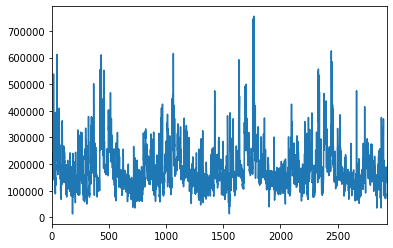

In [6]:
# Plots of Explorarty Data
ames_df['SalePrice'].plot()

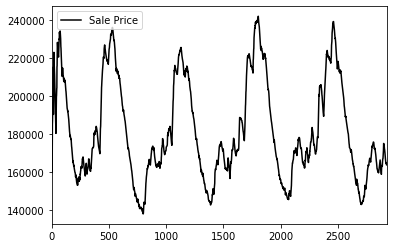

In [7]:
# Plot of Exponential Moving Average, 200 day

ewma200 = ames_df['SalePrice'].ewm(span=200).mean()

ewma200.plot(style = 'k-', label='Sale Price')
plt.legend()

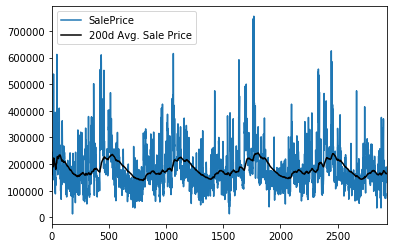

In [8]:
# Plot of Exponential Moving Average, 200 day

ewma200 = ames_df['SalePrice'].ewm(span=200).mean()
ames_df['SalePrice'].plot()
ewma200.plot(style = 'k-', label='200d Avg. Sale Price')
plt.legend()

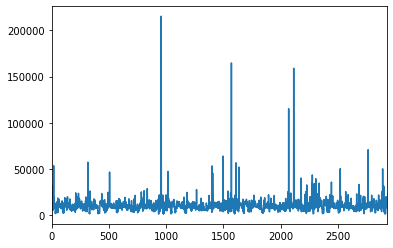

In [9]:
# Plots of Explorarty Data
# Plot of Lot Area
ames_df['LotArea'].plot()

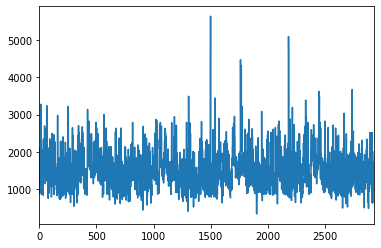

In [10]:
# PLot of  Total Square Feet
ames_df['TotalFlrSF'].plot()

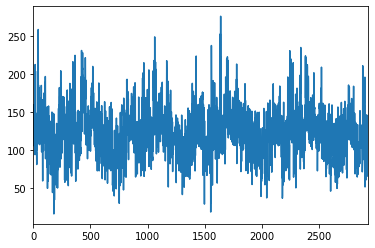

In [11]:
# plot of Price_per_Square_Feet
ames_df['Price_Sqft'].plot()

## Numerical Data_Model_1

In [12]:
# Create new subgroup with new columns
# create new list, called 'remove' to drop multiple columns

remove = ['SID','PID','SubClass','Zoning','LotFrontage','Street','Alley','LotShape','LandContour','SaleType',
          'SaleCondition','NgbrGr''OvrAllQualGrp', 'BsmtFinSFGrp','BldgType','BsmtCond','BsmtExposure',
         'BsmtFinSF2','BsmtFinType1','BsmtFinType2','BsmtFullBath', 'BsmtHalfBath','SecondFlrSF',
          'ThreeSsnPorch','TotRmsAbvGrd', 'CentralAir','Condition1','Condition2','Electrical','EnclosedPorch',
          'ExterCond','BsmtQual','ExterQual','Exterior1','Exterior2','Fence','FireplaceQu','RoofStyle''ScreenPorch',
          'Utilities','GarageCars','RoofMat','RoofStyle','PoolArea','YearBuilt','YearRemodel','YrSold','ScreenPorch',
         'GarageCond','OverallCond','OverallQual','OvrAllQualGrp','PavedDrive','PoolQC','GarageYrBlt',
         'Foundation','FullBath','Functional','GarageFinish','MiscVal','MoSold','Neighborhood','NgbrGrp',
         'GarageQual','GarageType','HalfBath','LowQualFinSF','MasVnrArea','MasVnrType','MiscFeature,'
         'Heating','HeatingQC','HouseStyle','LandSlope','LotConfig''MiscFeature',
         'Heating','KitchenAbvGr','KitchenQual']

ames_num_df= ames_df[ames_df.columns.difference(remove)]

ames_num_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea LotConfig MiscFeature  OpenPorchSF  Price_Sqft  \
0       1656    31770    Corner         NaN           62  129.830918   
1        896    11622    Inside         NaN            0  117.187500   
2       1329    14267    Corner        Gar2           36  129.420617   
3       2110    11160    Corner         NaN            0  115.639810   
4       1629    13830    Inside         NaN           34  116.574586   

   SalePrice  TotalBsmtSF  TotalFlrSF  WoodDeckSF  
0     215000       1080.0        1656         210  
1     105000        882.0         896         140  
2     172000       1329.0        1329         393  
3     244000       2110.0        2110           0  
4     189900        928.0        1629         212

In [13]:
# Last 5 rows
ames_num_df.tail()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
2925             3         819      184.0           0        1003       588.0   
2926             2         301      239.0           0         902       484.0   
2927             3         337      575.0           0         970         0.0   
2928             2        1071      195.0           1        1389       418.0   
2929             3         758      238.0           1         996       650.0   

      GrLivArea  LotArea LotConfig MiscFeature  OpenPorchSF  Price_Sqft  \
2925       1003     7937   CulDSac         NaN            0  142.073779   
2926        902     8885    Inside         NaN            0  145.232816   
2927        970    10441    Inside        Shed           32  136.082474   
2928       1389    10010    Inside         NaN           38  122.390209   
2929       2000     9627    Inside         NaN           48   94.000000   

      SalePrice  TotalBsmtSF  TotalFlrSF  WoodDeckSF  
2925     142500       1003.0        1003         120  
2926     131000        864.0         902         164  
2927     132000        912.0         970          80  
2928     170000       1389.0        1389         240  
2929     188000        996.0        2000         190

In [14]:
# df - size
ames_num_df.shape

(2930, 16)

In [15]:
# Calculate the correlation between each column
correlation = ames_num_df.corr()
correlation

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  \
BedroomAbvGr      1.000000   -0.118943   0.188146    0.076971    0.106648   
BsmtFinSF1       -0.118943    1.000000  -0.477875    0.295834    0.457433   
BsmtUnfSF         0.188146   -0.477875   1.000000    0.001389    0.295952   
Fireplaces        0.076971    0.295834   0.001389    1.000000    0.406345   
FirstFlrSF        0.106648    0.457433   0.295952    0.406345    1.000000   
GarageArea        0.073610    0.309828   0.164236    0.293853    0.491223   
GrLivArea         0.516808    0.209575   0.235473    0.454924    0.562166   
LotArea           0.136569    0.191543   0.023658    0.256989    0.332235   
OpenPorchSF       0.083650    0.124933   0.118880    0.159637    0.238041   
Price_Sqft       -0.359085    0.436081  -0.009495    0.186960    0.307479   
SalePrice         0.143913    0.432787   0.182855    0.474558    0.621676   
TotalBsmtSF       0.051941    0.536547   0.411726    0.333086    0.800720   
TotalFlrSF        0.512759    0.216657   0.232243    0.457714    0.565992   
WoodDeckSF        0.029711    0.223985  -0.039621    0.228064    0.227131   

              GarageArea  GrLivArea   LotArea  OpenPorchSF  Price_Sqft  \
BedroomAbvGr    0.073610   0.516808  0.136569     0.083650   -0.359085   
BsmtFinSF1      0.309828   0.209575  0.191543     0.124933    0.436081   
BsmtUnfSF       0.164236   0.235473  0.023658     0.118880   -0.009495   
Fireplaces      0.293853   0.454924  0.256989     0.159637    0.186960   
FirstFlrSF      0.491223   0.562166  0.332235     0.238041    0.307479   
GarageArea      1.000000   0.484892  0.212822     0.232912    0.408735   
GrLivArea       0.484892   1.000000  0.285599     0.340857   -0.066548   
LotArea         0.212822   0.285599  1.000000     0.103760    0.087458   
OpenPorchSF     0.232912   0.340857  0.103760     1.000000    0.107453   
Price_Sqft      0.408735  -0.066548  0.087458     0.107453    1.000000   
SalePrice       0.640401   0.706780  0.266549     0.312951    0.613204   
TotalBsmtSF     0.485504   0.444675  0.253589     0.245627    0.457442   
TotalFlrSF      0.492112   0.995795  0.286875     0.342538   -0.061741   
WoodDeckSF      0.238371   0.250153  0.157212     0.039243    0.215411   

              SalePrice  TotalBsmtSF  TotalFlrSF  WoodDeckSF  
BedroomAbvGr   0.143913     0.051941    0.512759    0.029711  
BsmtFinSF1     0.432787     0.536547    0.216657    0.223985  
BsmtUnfSF      0.182855     0.411726    0.232243   -0.039621  
Fireplaces     0.474558     0.333086    0.457714    0.228064  
FirstFlrSF     0.621676     0.800720    0.565992    0.227131  
GarageArea     0.640401     0.485504    0.492112    0.238371  
GrLivArea      0.706780     0.444675    0.995795    0.250153  
LotArea        0.266549     0.253589    0.286875    0.157212  
OpenPorchSF    0.312951     0.245627    0.342538    0.039243  
Price_Sqft     0.613204     0.457442   -0.061741    0.215411  
SalePrice      1.000000     0.632280    0.713588    0.327143  
TotalBsmtSF    0.632280     1.000000    0.448921    0.229931  
TotalFlrSF     0.713588     0.448921    1.000000    0.252776  
WoodDeckSF     0.327143     0.229931    0.252776    1.000000

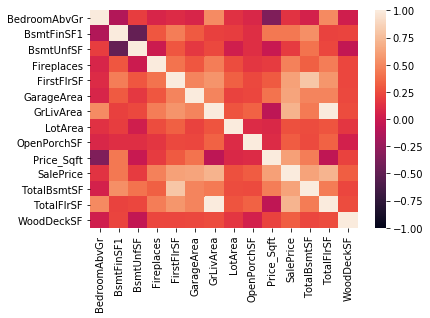

In [16]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

Plot of TotalFlrSF Vs. SalePrice


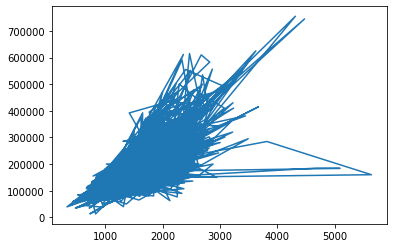

In [13]:
# Plot of Two Variables
print("Plot of TotalFlrSF Vs. SalePrice")
plt.plot(ames_num_df['TotalFlrSF'], ames_num_df['SalePrice']) 
plt.show()

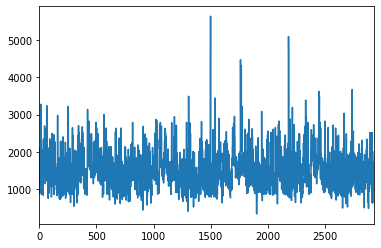

In [19]:
# plot of Price_per_Square_Feet
#ames_num_df['Price_Sqft'].plot()
ames_num_df['TotalFlrSF'].plot()
#ames_num_df['SalePrice'].plot()

## Regresson Model

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols (formula = 'SalePrice ~ BedroomAbvGr + BsmtFinSF1 + BsmtUnfSF + Fireplaces + FirstFlrSF + GarageArea + GrLivArea + LotArea + LotConfig + MiscFeature + OpenPorchSF + Price_Sqft + TotalBsmtSF + TotalFlrSF + WoodDeckSF', data = ames_num_df)

results1 = model.fit()

print("Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method")

print(results1.summary())

print(results1.params)

print(results1.conf_int())

Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     80.07
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.52e-46
Time:                        13:16:39   Log-Likelihood:                -1128.9
No. Observations:                 106   AIC:                             2300.
Df Residuals:                      85   BIC:                             2356.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Regression Model #2
## Remove non Significant Variables

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols (formula = 'SalePrice ~  GrLivArea + LotArea +  MiscFeature + OpenPorchSF + Price_Sqft + TotalFlrSF', data = ames_num_df)

results2 = model.fit()

print("Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method")

print(results2.summary())

print(results2.params)

print(results2.conf_int())

Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           3.90e-55
Time:                        13:59:32   Log-Likelihood:                -1136.7
No. Observations:                 106   AIC:                             2293.
Df Residuals:                      96   BIC:                             2320.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Q-Q Plot for Normality Test


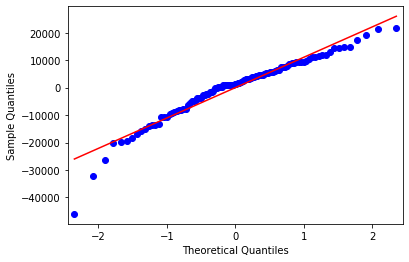

In [38]:
#Q-Q plot for normality 
import statsmodels.api as sm
print ("Q-Q Plot for Normality Test")
fig1=sm.qqplot(results2.resid, line='r') 
plt.show()

Residals Plot


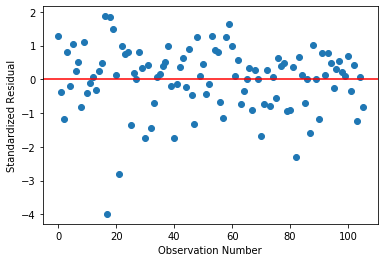

In [39]:
# simple plot of residuals 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# bug fix for display formats to avoid run time errors 
#pd.set_option('display.float_format', lambda x:'%.2f'%x) 


stdres=pd.DataFrame(results2.resid_pearson) 
fig2 = plt.plot(stdres, 'o', ls='None') 
l = plt.axhline(y=0, color='r') 
plt.ylabel('Standardized Residual') 
plt.xlabel('Observation Number')
print("Residals Plot")
plt.show()
print (fig2) 

In [46]:
## Absolute Model2 Fit
np.sqrt(results2.resid_pearson)

C:\Users\AnalyticsStudent\.conda\envs\careenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.12860627e+00,            nan,            nan, 8.96700841e-01,
                  nan, 1.01651476e+00, 4.91289081e-01, 7.05918438e-01,
                  nan, 1.05630318e+00,            nan,            nan,
       2.81810780e-01,            nan, 5.06715041e-01, 6.95306946e-01,
       1.36619007e+00,            nan, 1.35525132e+00, 1.21989929e+00,
       3.76843655e-01,            nan, 9.99170643e-01, 8.62118255e-01,
       9.03047807e-01,            nan, 4.21416240e-01, 1.36774770e-01,
       8.95640067e-01, 5.71903784e-01,            nan, 6.45017602e-01,
                  nan,            nan, 2.85879308e-01, 4.00677931e-01,
       6.26856957e-01, 7.13705089e-01, 9.90777257e-01,            nan,
                  nan,            nan, 5.95620894e-01, 7.98703438e-01,
                  nan, 9.52533001e-01,            nan,            nan,
       1.11850543e+00, 3.03363945e-01, 6.72622129e-01,            nan,
                  nan, 1.13626931e+00, 9.24938064e-01, 9.02343507e-01,
      

In [43]:
## Mean Squared Error of the Reisuals
results2.resid_pearson

array([ 1.27375210e+00, -3.78948577e-01, -1.18440953e+00,  8.04072399e-01,
       -2.08473337e-01,  1.03330226e+00,  2.41364961e-01,  4.98320841e-01,
       -8.27381402e-01,  1.11577640e+00, -4.08641183e-01, -9.65180617e-02,
        7.94173158e-02, -3.17577918e-01,  2.56760133e-01,  4.83451750e-01,
        1.86647532e+00, -3.98476688e+00,  1.83670613e+00,  1.48815428e+00,
        1.42011140e-01, -2.79855362e+00,  9.98341974e-01,  7.43247885e-01,
        8.15495342e-01, -1.35632362e+00,  1.77591647e-01,  1.87073377e-02,
        8.02171130e-01,  3.27073938e-01, -1.72342953e+00,  4.16047707e-01,
       -1.45232571e+00, -7.08387008e-01,  8.17269787e-02,  1.60542804e-01,
        3.92949644e-01,  5.09374954e-01,  9.81639574e-01, -1.88873741e-01,
       -1.73941105e+00, -1.43007911e-01,  3.54764249e-01,  6.37927182e-01,
       -2.29463932e-01,  9.07319117e-01, -4.77942434e-01, -1.31976897e+00,
        1.25105439e+00,  9.20296831e-02,  4.52420528e-01, -4.36395462e-01,
       -1.39542096e-01,  

## Regresson Model #3
## Predice Price_SqFt

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols (formula = 'Price_Sqft ~  GrLivArea + LotArea +  MiscFeature + OpenPorchSF + SalePrice + TotalFlrSF', data = ames_num_df)

results3 = model.fit()

print("Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method")

print(results3.summary())

print(results3.params)

print(results3.conf_int())

Regression Analysis for the Association between SalePrice and All Variables,w/OLS Method
                            OLS Regression Results                            
Dep. Variable:             Price_Sqft   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           2.34e-49
Time:                        14:07:45   Log-Likelihood:                -366.80
No. Observations:                 106   AIC:                             753.6
Df Residuals:                      96   BIC:                             780.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [50]:
## Model3 Fit: MSE
np.sqrt(results3.resid_pearson)

C:\Users\AnalyticsStudent\.conda\envs\careenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([           nan, 9.35407520e-01, 1.20389169e+00,            nan,
       5.56295070e-01,            nan,            nan,            nan,
       1.13710549e+00,            nan, 7.61066357e-01,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 1.88520523e+00,            nan,            nan,
       5.55279153e-01, 1.55400696e+00,            nan,            nan,
                  nan, 1.20112383e+00,            nan,            nan,
                  nan,            nan, 1.37646632e+00,            nan,
       1.31290038e+00, 8.51099018e-01,            nan,            nan,
                  nan,            nan,            nan, 4.73865031e-01,
       1.38847813e+00, 3.53244402e-01,            nan,            nan,
                  nan,            nan, 7.22711411e-01, 1.18346644e+00,
                  nan, 3.04233259e-01,            nan, 7.40092551e-01,
       6.88034525e-01,            nan,            nan,            nan,
      

Q-Q Plot for Normality Test


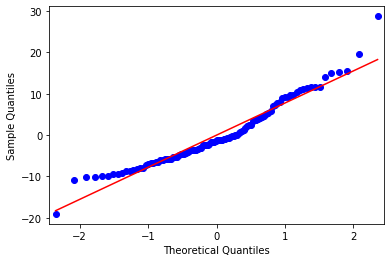

In [114]:
#Q-Q plot for normality 
import statsmodels.api as sm
print ("Q-Q Plot for Normality Test")
fig3=sm.qqplot(results3.resid, line='r') 
plt.show()

Residals Plot


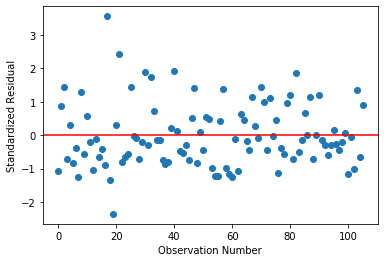

In [115]:
# simple plot of residuals 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# bug fix for display formats to avoid run time errors 
#pd.set_option('display.float_format', lambda x:'%.2f'%x) 


stdres=pd.DataFrame(results3.resid_pearson) 
fig3 = plt.plot(stdres, 'o', ls='None') 
l = plt.axhline(y=0, color='r') 
plt.ylabel('Standardized Residual') 
plt.xlabel('Observation Number')
print("Residals Plot")
plt.show()
print (fig3) 

## Deep Learning Model
## Predict the Sale Price

In [78]:
# Initial imports
#from pathlib import Path
#import pandas as pd
#import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

%matplotlib inline 

#tensorflow-gpu==1.14
#python 3.7
#CUDA v10.0
#cudnn 7.4.1.5

In [19]:
# Create new subgroup with new columns
# create new list, called 'remove' to drop multiple columns

remove = ['SID','PID','SubClass','Zoning','LotFrontage','Street','Alley','LotShape','LandContour','SaleType',
          'SaleCondition','NgbrGr''OvrAllQualGrp', 'BsmtFinSFGrp','BldgType','BsmtCond','BsmtExposure',
         'BsmtFinSF2','BsmtFinType1','BsmtFinType2','BsmtFullBath', 'BsmtHalfBath','SecondFlrSF',
          'ThreeSsnPorch','TotRmsAbvGrd', 'CentralAir','Condition1','Condition2','Electrical','EnclosedPorch',
          'ExterCond','BsmtQual','ExterQual','Exterior1','Exterior2','Fence','FireplaceQu','RoofStyle''ScreenPorch',
          'Utilities','GarageCars','RoofMat','RoofStyle','PoolArea','YearBuilt','YearRemodel','YrSold','ScreenPorch',
         'GarageCond','OverallCond','OverallQual','OvrAllQualGrp','PavedDrive','PoolQC','GarageYrBlt',
         'Foundation','FullBath','Functional','GarageFinish','MiscVal','MoSold','Neighborhood','NgbrGrp',
         'GarageQual','GarageType','HalfBath','LowQualFinSF','MasVnrArea','MasVnrType','MiscFeature,'
         'Heating','HeatingQC','HouseStyle','LandSlope','LotConfig''MiscFeature',
         'Heating','KitchenAbvGr','KitchenQual','MiscFeature','LotConfig']

ames_num2_df= ames_df[ames_df.columns.difference(remove)]

ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  
0        1656         210  
1         896         140  
2        1329         393  
3        2110           0  
4        1629         212

In [20]:
ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  
0        1656         210  
1         896         140  
2        1329         393  
3        2110           0  
4        1629         212

In [66]:
ames_num_df.tail()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
2925             3         819      184.0           0        1003       588.0   
2926             2         301      239.0           0         902       484.0   
2927             3         337      575.0           0         970         0.0   
2928             2        1071      195.0           1        1389       418.0   
2929             3         758      238.0           1         996       650.0   

      GrLivArea  LotArea LotConfig MiscFeature  OpenPorchSF  Price_Sqft  \
2925       1003     7937   CulDSac         NaN            0  142.073779   
2926        902     8885    Inside         NaN            0  145.232816   
2927        970    10441    Inside        Shed           32  136.082474   
2928       1389    10010    Inside         NaN           38  122.390209   
2929       2000     9627    Inside         NaN           48   94.000000   

      SalePrice  TotalBsmtSF  TotalFlrSF  WoodDeckSF  
2925     142500       1003.0        1003         120  
2926     131000        864.0         902         164  
2927     132000        912.0         970          80  
2928     170000       1389.0        1389         240  
2929     188000        996.0        2000         190

In [31]:
# Change the odrer of the sale price to the end of the data frame
df1 = ames_num2_df.pop('SalePrice') # remove sale price
ames_num2_df['saleprice'] = df1
ames_num2_df.head()

C:\Users\AnalyticsStudent\.conda\envs\careenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  TotalBsmtSF  TotalFlrSF  \
0       1656    31770           62  129.830918       1080.0        1656   
1        896    11622            0  117.187500        882.0         896   
2       1329    14267           36  129.420617       1329.0        1329   
3       2110    11160            0  115.639810       2110.0        2110   
4       1629    13830           34  116.574586        928.0        1629   

   WoodDeckSF  saleprice  
0         210     215000  
1         140     105000  
2         393     172000  
3           0     244000  
4         212     189900

In [33]:

# df - size
ames_num2_df.shape

# Check for missing values
ames_num2_df.isnull().count()
#.sum()
ames_num2_df.isnull().sum().sum()

3

In [43]:
# Filling missing values with the previous ones
ames_num2_df = ames_num2_df.fillna(method ='pad')

In [44]:
# Check for missing values
ames_num2_df.isnull().count()
#.sum()
ames_num2_df.isnull().sum().sum()

0

In [45]:
ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  
0        1656         210  
1         896         140  
2        1329         393  
3        2110           0  
4        1629         212

## Deep Learning ~ Price per SqFoot

In [88]:
X = ames_num2_df.iloc[:, 0:13].values
y = ames_num2_df["Price_Sqft"].values

In [89]:
# Unscaled X
print (X)

[[   3.  639.  441. ... 1080. 1656.  210.]
 [   2.  468.  270. ...  882.  896.  140.]
 [   3.  923.  406. ... 1329. 1329.  393.]
 ...
 [   3.  337.  575. ...  912.  970.   80.]
 [   2. 1071.  195. ... 1389. 1389.  240.]
 [   3.  758.  238. ...  996. 2000.  190.]]


In [90]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [91]:
# Scaled X
print(X)

[[ 0.17609421  0.43116531 -0.26913047 ...  0.06480791  0.3200242
   0.92012131]
 [-1.03223376  0.05570037 -0.65834567 ... -0.38462381 -1.19077715
   0.36606082]
 [ 0.17609421  1.05474449 -0.3487944  ...  0.63000234 -0.33001796
   2.36859372]
 ...
 [ 0.17609421 -0.23193651  0.03586858 ... -0.31652809 -1.0436728
  -0.10884817]
 [-1.03223376  1.3797083  -0.82905409 ...  0.76619376 -0.21074417
   1.1575758 ]
 [ 0.17609421  0.69245377 -0.73118127 ... -0.12586009  1.0038606
   0.76181831]]


In [92]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 13

nn = Sequential()
# Hidden layer
nn.add(
 Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))  

In [93]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 2051 samples, validate on 879 samples
Epoch 1/200
2051/2051 [==============================] - 0s 190us/sample - loss: 15244.8800 - mse: 15244.8779 - val_loss: 14869.1688 - val_mse: 14869.1709
Epoch 2/200
2051/2051 [==============================] - 0s 57us/sample - loss: 14952.0080 - mse: 14952.0088 - val_loss: 14543.7532 - val_mse: 14543.7520
Epoch 3/200
2051/2051 [==============================] - 0s 54us/sample - loss: 14582.4320 - mse: 14582.4336 - val_loss: 14142.9702 - val_mse: 14142.9697
Epoch 4/200
2051/2051 [==============================] - 0s 56us/sample - loss: 14132.1403 - mse: 14132.1406 - val_loss: 13663.2684 - val_mse: 13663.2686
Epoch 5/200
2051/2051 [==============================] - 0s 54us/sample - loss: 13605.9534 - mse: 13605.9541 - val_loss: 13115.0505 - val_mse: 13115.0508
Epoch 6/200
2051/2051 [==============================] - 0s 58us/sample - loss: 13011.6392 - mse: 13011.6426 - val_loss: 12503.1791 - val_mse: 12503.1797
Epoch 7/200
2051/2051 [=====

Epoch 55/200
2051/2051 [==============================] - 0s 58us/sample - loss: 1821.2443 - mse: 1821.2441 - val_loss: 2035.9818 - val_mse: 2035.9817
Epoch 56/200
2051/2051 [==============================] - 0s 72us/sample - loss: 1753.0870 - mse: 1753.0868 - val_loss: 1957.8250 - val_mse: 1957.8250
Epoch 57/200
2051/2051 [==============================] - 0s 120us/sample - loss: 1685.9878 - mse: 1685.9880 - val_loss: 1883.5249 - val_mse: 1883.5249
Epoch 58/200
2051/2051 [==============================] - 0s 74us/sample - loss: 1620.0768 - mse: 1620.0769 - val_loss: 1810.7442 - val_mse: 1810.7443
Epoch 59/200
2051/2051 [==============================] - 0s 53us/sample - loss: 1555.6342 - mse: 1555.6343 - val_loss: 1742.0623 - val_mse: 1742.0623
Epoch 60/200
2051/2051 [==============================] - 0s 45us/sample - loss: 1492.0451 - mse: 1492.0447 - val_loss: 1673.4951 - val_mse: 1673.4950
Epoch 61/200
2051/2051 [==============================] - 0s 63us/sample - loss: 1428.9175 - 

2051/2051 [==============================] - 0s 46us/sample - loss: 75.4617 - mse: 75.4617 - val_loss: 74.5359 - val_mse: 74.5359
Epoch 167/200
2051/2051 [==============================] - 0s 65us/sample - loss: 75.3163 - mse: 75.3163 - val_loss: 73.5141 - val_mse: 73.5141
Epoch 168/200
2051/2051 [==============================] - 0s 57us/sample - loss: 74.9516 - mse: 74.9516 - val_loss: 73.7207 - val_mse: 73.7207
Epoch 169/200
2051/2051 [==============================] - 0s 79us/sample - loss: 74.9326 - mse: 74.9326 - val_loss: 73.5892 - val_mse: 73.5892
Epoch 170/200
2051/2051 [==============================] - 0s 63us/sample - loss: 74.6231 - mse: 74.6231 - val_loss: 73.2032 - val_mse: 73.2032
Epoch 171/200
2051/2051 [==============================] - 0s 51us/sample - loss: 74.9891 - mse: 74.9891 - val_loss: 72.6353 - val_mse: 72.6353
Epoch 172/200
2051/2051 [==============================] - 0s 48us/sample - loss: 74.7479 - mse: 74.7479 - val_loss: 72.3566 - val_mse: 72.3566
Epoch 

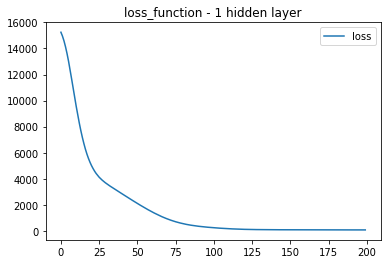

In [94]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

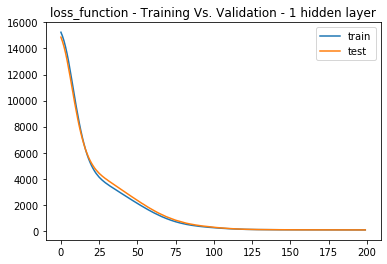

In [95]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [99]:
# Define the model - deep neural net
number_input_features = 13
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [100]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 2051 samples, validate on 879 samples
Epoch 1/200
2051/2051 [==============================] - 0s 190us/sample - loss: 15416.5854 - mse: 15416.5840 - val_loss: 14966.5226 - val_mse: 14966.5195
Epoch 2/200
2051/2051 [==============================] - 0s 53us/sample - loss: 14970.8546 - mse: 14970.8564 - val_loss: 14354.4229 - val_mse: 14354.4209
Epoch 3/200
2051/2051 [==============================] - 0s 49us/sample - loss: 14172.1825 - mse: 14172.1816 - val_loss: 13263.1030 - val_mse: 13263.1035
Epoch 4/200
2051/2051 [==============================] - 0s 52us/sample - loss: 12843.1280 - mse: 12843.1250 - val_loss: 11624.4691 - val_mse: 11624.4678
Epoch 5/200
2051/2051 [==============================] - 0s 49us/sample - loss: 11000.5137 - mse: 11000.5137 - val_loss: 9584.0669 - val_mse: 9584.0664
Epoch 6/200
2051/2051 [==============================] - 0s 49us/sample - loss: 8914.2425 - mse: 8914.2432 - val_loss: 7556.6075 - val_mse: 7556.6069
Epoch 7/200
2051/2051 [===========

Epoch 56/200
2051/2051 [==============================] - 0s 54us/sample - loss: 117.1619 - mse: 117.1619 - val_loss: 150.7780 - val_mse: 150.7780
Epoch 57/200
2051/2051 [==============================] - 0s 51us/sample - loss: 113.4925 - mse: 113.4925 - val_loss: 145.2452 - val_mse: 145.2452
Epoch 58/200
2051/2051 [==============================] - 0s 51us/sample - loss: 110.4587 - mse: 110.4587 - val_loss: 139.9203 - val_mse: 139.9203
Epoch 59/200
2051/2051 [==============================] - 0s 48us/sample - loss: 107.9866 - mse: 107.9866 - val_loss: 135.3932 - val_mse: 135.3932
Epoch 60/200
2051/2051 [==============================] - 0s 49us/sample - loss: 104.5651 - mse: 104.5651 - val_loss: 130.3239 - val_mse: 130.3239
Epoch 61/200
2051/2051 [==============================] - 0s 47us/sample - loss: 102.6954 - mse: 102.6954 - val_loss: 127.0617 - val_mse: 127.0617
Epoch 62/200
2051/2051 [==============================] - 0s 68us/sample - loss: 100.3997 - mse: 100.3997 - val_loss: 

Epoch 113/200
2051/2051 [==============================] - 0s 50us/sample - loss: 70.3537 - mse: 70.3537 - val_loss: 74.0061 - val_mse: 74.0061
Epoch 114/200
2051/2051 [==============================] - 0s 48us/sample - loss: 70.5351 - mse: 70.5351 - val_loss: 72.4263 - val_mse: 72.4263
Epoch 115/200
2051/2051 [==============================] - 0s 47us/sample - loss: 70.0571 - mse: 70.0571 - val_loss: 72.2922 - val_mse: 72.2922
Epoch 116/200
2051/2051 [==============================] - 0s 56us/sample - loss: 70.2392 - mse: 70.2392 - val_loss: 72.0086 - val_mse: 72.0086
Epoch 117/200
2051/2051 [==============================] - 0s 65us/sample - loss: 69.7397 - mse: 69.7397 - val_loss: 71.7896 - val_mse: 71.7896
Epoch 118/200
2051/2051 [==============================] - 0s 95us/sample - loss: 69.6802 - mse: 69.6802 - val_loss: 73.4410 - val_mse: 73.4410
Epoch 119/200
2051/2051 [==============================] - 0s 94us/sample - loss: 70.0582 - mse: 70.0583 - val_loss: 71.9766 - val_mse: 

Epoch 170/200
2051/2051 [==============================] - 0s 69us/sample - loss: 65.3594 - mse: 65.3594 - val_loss: 64.6990 - val_mse: 64.6990
Epoch 171/200
2051/2051 [==============================] - 0s 62us/sample - loss: 65.3879 - mse: 65.3879 - val_loss: 64.5716 - val_mse: 64.5716
Epoch 172/200
2051/2051 [==============================] - 0s 70us/sample - loss: 65.5255 - mse: 65.5255 - val_loss: 64.0988 - val_mse: 64.0988
Epoch 173/200
2051/2051 [==============================] - 0s 68us/sample - loss: 65.7776 - mse: 65.7776 - val_loss: 65.0537 - val_mse: 65.0537
Epoch 174/200
2051/2051 [==============================] - 0s 57us/sample - loss: 65.7103 - mse: 65.7103 - val_loss: 66.0150 - val_mse: 66.0150
Epoch 175/200
2051/2051 [==============================] - 0s 54us/sample - loss: 66.4983 - mse: 66.4983 - val_loss: 64.5791 - val_mse: 64.5791
Epoch 176/200
2051/2051 [==============================] - 0s 57us/sample - loss: 65.5098 - mse: 65.5098 - val_loss: 64.4747 - val_mse: 

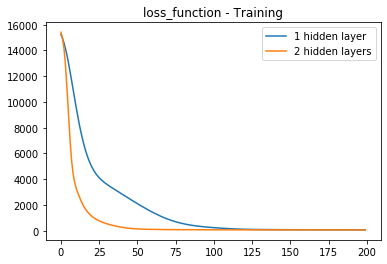

In [101]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

## Deep Learning2
## Predict the Sale Price

In [68]:
ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  
0        1656         210  
1         896         140  
2        1329         393  
3        2110           0  
4        1629         212

In [102]:
# Change the odrer of the sale price to the end of the data frame
df2 = ames_num2_df.pop('SalePrice') # remove sale price
ames_num2_df['SalePrice'] = df2
ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  TotalBsmtSF  TotalFlrSF  WoodDeckSF  \
0       1656    31770           62       1080.0        1656         210   
1        896    11622            0        882.0         896         140   
2       1329    14267           36       1329.0        1329         393   
3       2110    11160            0       2110.0        2110           0   
4       1629    13830           34        928.0        1629         212   

   Price_Sqft  SalePrice  
0  129.830918     215000  
1  117.187500     105000  
2  129.420617     172000  
3  115.639810     244000  
4  116.574586     189900

In [103]:
# df - size
ames_num2_df.shape

(2930, 14)

In [104]:
X = ames_num2_df.iloc[:, 0:13].values
y = ames_num2_df["SalePrice"].values

In [105]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [106]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 13

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))  # sigmoid , linear

In [107]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 2051 samples, validate on 879 samples
Epoch 1/200
2051/2051 [==============================] - 0s 172us/sample - loss: 39323714892.0137 - mse: 39323717632.0000 - val_loss: 38467036482.6940 - val_mse: 38467035136.0000
Epoch 2/200
2051/2051 [==============================] - 0s 53us/sample - loss: 39323403643.9434 - mse: 39323406336.0000 - val_loss: 38466710212.2958 - val_mse: 38466711552.0000
Epoch 3/200
2051/2051 [==============================] - 0s 46us/sample - loss: 39323051078.3969 - mse: 39323049984.0000 - val_loss: 38466333005.1786 - val_mse: 38466334720.0000
Epoch 4/200
2051/2051 [==============================] - 0s 47us/sample - loss: 39322636937.0492 - mse: 39322640384.0000 - val_loss: 38465880313.3015 - val_mse: 38465880064.0000
Epoch 5/200
2051/2051 [==============================] - 0s 49us/sample - loss: 39322155554.1999 - mse: 39322148864.0000 - val_loss: 38465344860.3231 - val_mse: 38465339392.0000
Epoch 6/200
2051/2051 [==============================] - 0s 47

Epoch 92/200
2051/2051 [==============================] - 0s 58us/sample - loss: 38786181419.0619 - mse: 38786187264.0000 - val_loss: 37933887571.8771 - val_mse: 37933891584.0000
Epoch 93/200
2051/2051 [==============================] - 0s 52us/sample - loss: 38776051962.6329 - mse: 38776041472.0000 - val_loss: 37924020203.0307 - val_mse: 37924020224.0000
Epoch 94/200
2051/2051 [==============================] - 0s 62us/sample - loss: 38765569499.8030 - mse: 38765572096.0000 - val_loss: 37913556733.3788 - val_mse: 37913554944.0000
Epoch 95/200
2051/2051 [==============================] - 0s 65us/sample - loss: 38755150672.2574 - mse: 38755143680.0000 - val_loss: 37903530105.1559 - val_mse: 37903527936.0000
Epoch 96/200
2051/2051 [==============================] - 0s 55us/sample - loss: 38744822618.7421 - mse: 38744825856.0000 - val_loss: 37893307078.6257 - val_mse: 37893312512.0000
Epoch 97/200
2051/2051 [==============================] - 0s 49us/sample - loss: 38734206963.0190 - mse: 

2051/2051 [==============================] - 0s 49us/sample - loss: 37561715215.2277 - mse: 37561712640.0000 - val_loss: 36734908066.5119 - val_mse: 36734906368.0000
Epoch 183/200
2051/2051 [==============================] - 0s 46us/sample - loss: 37544890884.2438 - mse: 37544894464.0000 - val_loss: 36718209729.9659 - val_mse: 36718206976.0000
Epoch 184/200
2051/2051 [==============================] - 0s 44us/sample - loss: 37527976654.9469 - mse: 37527986176.0000 - val_loss: 36701364526.8896 - val_mse: 36701364224.0000
Epoch 185/200
2051/2051 [==============================] - 0s 46us/sample - loss: 37510805345.2326 - mse: 37510807552.0000 - val_loss: 36684887239.2082 - val_mse: 36684886016.0000
Epoch 186/200
2051/2051 [==============================] - 0s 48us/sample - loss: 37493583600.3979 - mse: 37493579776.0000 - val_loss: 36668209792.7281 - val_mse: 36668207104.0000
Epoch 187/200
2051/2051 [==============================] - 0s 63us/sample - loss: 37476473623.8401 - mse: 37476474

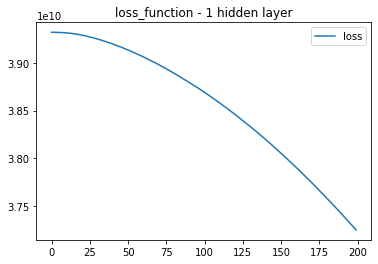

In [108]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

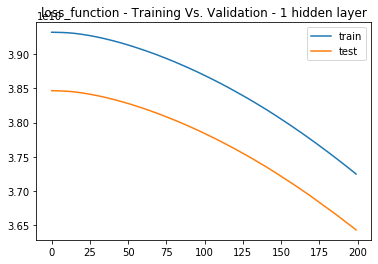

In [109]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [110]:
# Define the model - deep neural net
number_input_features = 13
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [111]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 2051 samples, validate on 879 samples
Epoch 1/200
2051/2051 [==============================] - 1s 277us/sample - loss: 39323700591.9610 - mse: 39323705344.0000 - val_loss: 38466950979.2765 - val_mse: 38466953216.0000
Epoch 2/200
2051/2051 [==============================] - 0s 60us/sample - loss: 39323172340.7665 - mse: 39323172864.0000 - val_loss: 38466296537.2651 - val_mse: 38466297856.0000
Epoch 3/200
2051/2051 [==============================] - 0s 58us/sample - loss: 39322258618.2272 - mse: 39322263552.0000 - val_loss: 38465138429.3788 - val_mse: 38465142784.0000
Epoch 4/200
2051/2051 [==============================] - 0s 83us/sample - loss: 39320737593.2911 - mse: 39320735744.0000 - val_loss: 38463324835.6769 - val_mse: 38463320064.0000
Epoch 5/200
2051/2051 [==============================] - 0s 63us/sample - loss: 39318420084.0800 - mse: 39318425600.0000 - val_loss: 38460657330.8214 - val_mse: 38460657664.0000
Epoch 6/200
2051/2051 [==============================] - 0s 61

Epoch 92/200
2051/2051 [==============================] - 0s 89us/sample - loss: 24176527876.2438 - mse: 24176525312.0000 - val_loss: 23890232105.6473 - val_mse: 23890233344.0000
Epoch 93/200
2051/2051 [==============================] - 0s 75us/sample - loss: 23882394081.2950 - mse: 23882389504.0000 - val_loss: 23623551122.7850 - val_mse: 23623553024.0000
Epoch 94/200
2051/2051 [==============================] - 0s 99us/sample - loss: 23595027604.2828 - mse: 23595026432.0000 - val_loss: 23350748410.4664 - val_mse: 23350749184.0000
Epoch 95/200
2051/2051 [==============================] - 0s 67us/sample - loss: 23305366447.6177 - mse: 23305371648.0000 - val_loss: 23087844121.3379 - val_mse: 23087847424.0000
Epoch 96/200
2051/2051 [==============================] - 0s 64us/sample - loss: 23024620946.9098 - mse: 23024623616.0000 - val_loss: 22834692487.4266 - val_mse: 22834692096.0000
Epoch 97/200
2051/2051 [==============================] - 0s 60us/sample - loss: 22747751347.6119 - mse: 

2051/2051 [==============================] - 0s 68us/sample - loss: 12355919736.1989 - mse: 12355920896.0000 - val_loss: 13621919200.5461 - val_mse: 13621918720.0000
Epoch 183/200
2051/2051 [==============================] - 0s 60us/sample - loss: 12314567482.7889 - mse: 12314565632.0000 - val_loss: 13583291300.5506 - val_mse: 13583291392.0000
Epoch 184/200
2051/2051 [==============================] - 0s 76us/sample - loss: 12272774081.0921 - mse: 12272772096.0000 - val_loss: 13543941446.1889 - val_mse: 13543941120.0000
Epoch 185/200
2051/2051 [==============================] - 0s 92us/sample - loss: 12231606249.0336 - mse: 12231607296.0000 - val_loss: 13505051649.1650 - val_mse: 13505052672.0000
Epoch 186/200
2051/2051 [==============================] - 0s 79us/sample - loss: 12189618790.5997 - mse: 12189621248.0000 - val_loss: 13465795852.5233 - val_mse: 13465797632.0000
Epoch 187/200
2051/2051 [==============================] - 0s 55us/sample - loss: 12148142183.3486 - mse: 12148142

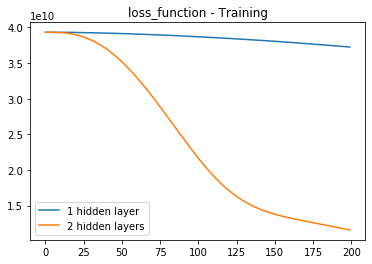

In [112]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

## K Means Cluster Analysis
### reference lesson_13_01_Kmeans
### Cluster Analysis

In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import plotly.express as px
import hvplot.pandas

In [22]:
ames_num2_df.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  
0        1656         210  
1         896         140  
2        1329         393  
3        2110           0  
4        1629         212

In [23]:
ames_num2_df.tail()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
2925             3         819      184.0           0        1003       588.0   
2926             2         301      239.0           0         902       484.0   
2927             3         337      575.0           0         970         0.0   
2928             2        1071      195.0           1        1389       418.0   
2929             3         758      238.0           1         996       650.0   

      GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
2925       1003     7937            0  142.073779     142500       1003.0   
2926        902     8885            0  145.232816     131000        864.0   
2927        970    10441           32  136.082474     132000        912.0   
2928       1389    10010           38  122.390209     170000       1389.0   
2929       2000     9627           48   94.000000     188000        996.0   

      TotalFlrSF  WoodDeckSF  
2925        1003         120  
2926         902         164  
2927         970          80  
2928        1389         240  
2929        2000         190

In [36]:
X = ames_num2_df.iloc[:, 0:13].values

In [37]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [46]:
# Scree Plot
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(ames_num2_df)  #X = scaled ames_num2_df transformed
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [47]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [48]:
# Looking for clusters the first best value of k
seven_clusters = get_clusters(7, ames_num2_df)
seven_clusters.head()

BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  Fireplaces  FirstFlrSF  GarageArea  \
0             3         639      441.0           2        1656       528.0   
1             2         468      270.0           0         896       730.0   
2             3         923      406.0           0        1329       312.0   
3             3        1065     1045.0           2        2110       522.0   
4             3         791      137.0           1         928       482.0   

   GrLivArea  LotArea  OpenPorchSF  Price_Sqft  SalePrice  TotalBsmtSF  \
0       1656    31770           62  129.830918     215000       1080.0   
1        896    11622            0  117.187500     105000        882.0   
2       1329    14267           36  129.420617     172000       1329.0   
3       2110    11160            0  115.639810     244000       2110.0   
4       1629    13830           34  116.574586     189900        928.0   

   TotalFlrSF  WoodDeckSF  class  
0        1656         210      3  
1         896         140      2  
2        1329         393      0  
3        2110           0      3  
4        1629         212      0

In [52]:
# Plotting the 2D-Scatter with x="Price_Sqft" and y="Sale Price"
seven_clusters.hvplot.scatter(x="Price_Sqft", y="SalePrice", by="class")

:NdOverlay   [class]
   :Scatter   [Price_Sqft]   (SalePrice)

In [57]:
# Plotting the 2D-Scatter with x="TotalFlr_Sqft" and y="Sale Price"
seven_clusters.hvplot.scatter(x="BedroomAbvGr", y="SalePrice", by="class") # Class = cluster number

:NdOverlay   [class]
   :Scatter   [BedroomAbvGr]   (SalePrice)

In [58]:
# Plotting the 3D-Scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    seven_clusters,
    x="BedroomAbvGr",
    y="Price_Sqft",
    z="SalePrice",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()